In [144]:
import numpy as np
import random
import string
import time
import matplotlib.pyplot as plt


# 1. Funciones de Ordenamiento

### 1.1 Merge Sort Recursivo

In [1]:
def merge_sort(lista):
    tam = len(lista)
    
    if(tam==1):
        return lista
    
    mitad = tam//2
    #Para asegurarnos de que todas las particiones sean descompuestas a sus componentes individuales, 
    #llamamos recursivamente a la funcion merge sort
    izquierda = merge_sort(lista[:mitad])
    derecha = merge_sort(lista[mitad:])

    #una vez descompuesto a la unidad, se empieza a unir por las llamadas en el Call Stack
    return merge(izquierda, derecha)
    
##merge es el que realmente ordena, al ir checando los componentes        
def merge(izquierda, derecha):
    lista_ordenada =[]
    i=j=0
    
    while i < len(izquierda) and j < len(derecha):
        #compara los elementos en cada posicion de ambas listas
        if izquierda[i] < derecha[j]:
            lista_ordenada.append(izquierda[i])
            i += 1
        else:
            lista_ordenada.append(derecha[j])
            j +=1
            
    #los elemntos restantes son agregados al final de la lista
    #claro esta que solo 1 de izquierda o derecha tendra elementos que agregar
    lista_ordenada.extend(izquierda[i:])
    lista_ordenada.extend(derecha[j:])
    
    return lista_ordenada

### 1.2 Selection Sort

In [85]:
def selection_sort(A):
    for i in range(len(A)):
        minimo=i;
        for j in range(i,len(A)):
            if(A[j] < A[minimo]):
                minimo=j
        if(minimo != i):
            aux=A[i]
            A[i]=A[minimo]
            A[minimo]=aux 
    return A       

### 1.3 Insertion Sort

In [87]:
def insertion_sort(listas):
    for i in range(1,len(listas),1):
        a=listas[i]
        j=i
        while(j>0 and a<listas[j-1]):
            listas[j]=listas[j-1]
            j=j-1
        listas[j]=a 
    return listas


### 1.4 Merge Sort Iterativo

In [108]:
def merge_it(lista, aux, desde, medio, hasta):
 
    k = desde #para la auxiliar
    i = desde #para la original, primera mitad
    j = medio + 1 #para la original, segunda mitad
 
    # while hasta que no halla elementos ni en la izquierda ni en la derecha
    while i <= medio and j <= hasta:
        if lista[i] < lista[j]:
            aux[k] = lista[i]
            i += 1
        else:
            aux[k] = lista[j]
            j += 1
 
        k += 1
 
    #naturalmente, se cumplira una de las 2 condiciones.
    #por lo cual debemos de copiar los elementos restantes
    #aunque es obvio que no ocupamos copiar la otra mitad, porque ya estan ordenados en su posicion
    while i < len(lista) and i <= medio:
        aux[k] = lista[i]
        k += 1
        i += 1
 
    # Copiamos a la lista original para que, ahora si, este ordenado
    for i in range(desde, hasta + 1):
        lista[i] = aux[i]

In [105]:
def mergesort_it(lista):
 
    inicio = 0
    fin = len(lista) - 1
 
    # Ordena la lista usando una lista auxiliar
    aux = lista.copy()
 
    # divide la lista en bloques de tamaño 'm'
    # m = [1, 2, 4, 8, 16…]
 
    m = 1
    while m <= (fin - inicio): #ie, mientras podamos seguir haciendo subdivisiones
 
        # m = 1, i = [0, 2, 4, 6, 8…]
        # m = 2, i = [0, 4, 8, 12…]
        # m = 4, i = [0, 8, 16…]
        # …
 
        for i in range(inicio, fin, 2*m):
            desde = i
            medio = (i + m) - 1
            hasta = min( (i + 2*m - 1), fin) 
            #llegara el punto donde i+2*m superara a fin, en ese caso no podemos llamar a posiciones que no existen
            merge_it(lista, aux, desde, medio, hasta)
 
        m = 2*m

# 2. Generacion de Datos

### 2.1 Enteros

In [67]:
lista_enteros_ascendiente = []
lista_enteros_descendiente = []
lista_aleatorio_1 = []
lista_aleatorio_2 = []

In [68]:
def generacion_ordenados(n=1000):
    lista_enteros_ascendiente.clear() 
    lista_enteros_descendiente.clear()
    for i in range(n):
        lista_enteros_ascendiente.append(i)
    for i in range(n):
        lista_enteros_descendiente.append(n-i)

In [55]:
def generacion_aleatorios(n=1000):
    lista_aleatorio_1.clear()
    lista_aleatorio_2.clear()
    for i in range(n):
        lista_aleatorio_1.append(random.randint(0,n))
    for i in range(n):
        lista_aleatorio_2.append(random.randint(-999999,999999))

### 2.2 Strings Aleatorios

In [136]:
cadenas_aleatorias=[]

In [137]:
def get_random_string4():
    randomString=''.join(random.choice(string.ascii_lowercase) for i in range(4))
    return randomString

In [155]:
def generacion_cadenas_aleatorias(n=1000):
    cadenas_aleatorias.clear()
    for i in range(0,n):
        num = get_random_string4()
        cadenas_aleatorias.append(num)

### 2.3 Persona

In [60]:
lista_de_personas = []

In [61]:
def generarPeso():
    return random.uniform(40,200)
    
def generarAltura():
    return random.randint(140,200) 

In [62]:
class Persona():
    def __init__(self, peso, altura):
        self.peso = peso
        self.altura = altura
            
    def __eq__(self, otro):
        if isinstance(otro, Persona):
            return self.peso == otro.peso and self.altura == otro.altura
        return False

    def __gt__(self, otro):
        if isinstance(otro, Persona):
            if(self.altura > otro.altura):
                return True
            elif(self.altura==self.altura):
                return self.peso > otro.peso
        return False

    def __lt__(self, otro):
        if isinstance(otro, Persona):
            if(self.altura < otro.altura):
                return True
            elif(self.altura==self.altura):
                return self.peso < otro.peso
    
    def __str__(self):
        texto = "La persona mide "
        texto += str(self.altura) + " cm y pesa "
        texto += str(self.peso) + " kg" 
        return texto

    def __repr__(self):
        return self.__str__()

In [191]:
def generacion_de_personas(n=1000):
    lista_de_personas.clear()
    for i in range(0, n):
        p = Persona(generarPeso(), generarAltura())
        lista_de_personas.append(p)

# 3. Multiples Pruebas

In [156]:
generacion_ordenados()
generacion_aleatorios()

Pruebas con enteros Ordenados

In [74]:
tiempos_ms_enteros_ascendentes = []
tiempos_is_enteros_ascendentes = []
tiempos_ss_enteros_ascendentes = []

In [88]:
for i in range(0, 20):    
    lista_or = lista_enteros_ascendiente.copy()
    start_time = time.time()
    mergesort_it(lista_or)
    end_time = time.time()
    duracion_ms = (end_time - start_time)*1000
    
    lista_or = lista_enteros_ascendiente.copy()
    start_time = time.time()
    insertion_sort(lista_or)
    end_time = time.time()
    duracion_is = (end_time - start_time)*1000

    lista_or = lista_enteros_ascendiente.copy()
    start_time = time.time()
    selection_sort(lista_or)
    end_time = time.time()
    duracion_ss = (end_time - start_time)*1000    
    
    
    tiempos_ms_enteros_ascendentes.append(duracion_ms)
    tiempos_is_enteros_ascendentes.append(duracion_is)
    tiempos_ss_enteros_ascendentes.append(duracion_ss)


Pruebas con enteros de mayor a menor

In [92]:
tiempos_ms_enteros_descendientes = []
tiempos_is_enteros_descendientes = []
tiempos_ss_enteros_descendientes = []

In [93]:
for i in range(0, 20):    
    lista_des = lista_enteros_descendiente.copy()
    start_time = time.time()
    mergesort_it(lista_des)
    end_time = time.time()
    duracion_ms = (end_time - start_time)*1000
    
    lista_des = lista_enteros_descendiente.copy()
    start_time = time.time()
    insertion_sort(lista_des)
    end_time = time.time()
    duracion_is = (end_time - start_time)*1000

    lista_des = lista_enteros_descendiente.copy()
    start_time = time.time()
    selection_sort(lista_des)
    end_time = time.time()
    duracion_ss = (end_time - start_time)*1000    
    
    
    tiempos_ms_enteros_descendientes.append(duracion_ms)
    tiempos_is_enteros_descendientes.append(duracion_is)
    tiempos_ss_enteros_descendientes.append(duracion_ss)

Pruebas con enteros aleatorios

In [100]:
tiempos_ms_enteros_aleatorios1 = []
tiempos_ms_enteros_aleatorios2 = []
tiempos_is_enteros_aleatorios1 = []
tiempos_is_enteros_aleatorios2 = []
tiempos_ss_enteros_aleatorios1 = []
tiempos_ss_enteros_aleatorios2 = []

In [101]:
for i in range(0, 20):
    
    lista_al_1 = lista_aleatorio_1.copy()
    start_time = time.time()
    mergesort_it(lista_al_1)
    end_time = time.time()
    duracion_ms = (end_time - start_time)*1000
    
    lista_al_1 = lista_aleatorio_1.copy()
    start_time = time.time()
    insertion_sort(lista_al_1)
    end_time = time.time()
    duracion_is = (end_time - start_time)*1000

    lista_al_1 = lista_aleatorio_1.copy()
    start_time = time.time()
    selection_sort(lista_al_1)
    end_time = time.time()
    duracion_ss = (end_time - start_time)*1000    
    
    
    tiempos_ms_enteros_aleatorios1.append(duracion_ms)
    tiempos_is_enteros_aleatorios1.append(duracion_is)
    tiempos_ss_enteros_aleatorios1.append(duracion_ss)

In [102]:
for i in range(0, 20):
    
    lista_al_2 = lista_aleatorio_2.copy()
    start_time = time.time()
    mergesort_it(lista_al_2)
    end_time = time.time()
    duracion_ms = (end_time - start_time)*1000
    
    lista_al_2 = lista_aleatorio_2.copy()
    start_time = time.time()
    insertion_sort(lista_al_2)
    end_time = time.time()
    duracion_is = (end_time - start_time)*1000

    lista_al_2 = lista_aleatorio_2.copy()
    start_time = time.time()
    selection_sort(lista_al_2)
    end_time = time.time()
    duracion_ss = (end_time - start_time)*1000    
    
    
    tiempos_ms_enteros_aleatorios2.append(duracion_ms)
    tiempos_is_enteros_aleatorios2.append(duracion_is)
    tiempos_ss_enteros_aleatorios2.append(duracion_ss)

Pruebas con cadenas aleatorias

In [178]:
tiempos_ms_cadenas_aleatorias = []
tiempos_is_cadenas_aleatorias = []
tiempos_ss_cadenas_aleatorias = []
generacion_cadenas_aleatorias()

In [179]:
for i in range(0, 20):
    
    lista_cad = cadenas_aleatorias.copy()
    start_time = time.time()
    mergesort_it(lista_cad)
    end_time = time.time()
    duracion_ms = (end_time - start_time)*1000
    
    lista_cad = cadenas_aleatorias.copy()
    start_time = time.time()
    insertion_sort(lista_cad)
    end_time = time.time()
    duracion_is = (end_time - start_time)*1000

    lista_cad = cadenas_aleatorias.copy()
    start_time = time.time()
    selection_sort(lista_al_2)
    end_time = time.time()
    duracion_ss = (end_time - start_time)*1000    
    
    
    tiempos_ms_cadenas_aleatorias.append(duracion_ms)
    tiempos_is_cadenas_aleatorias.append(duracion_is)
    tiempos_ss_cadenas_aleatorias.append(duracion_ss)

Pruebas con Objetos Persona aleatorio

In [200]:
tiempos_ms_personas = []
tiempos_is_personas = []
tiempos_ss_personas = []

In [201]:
generacion_de_personas()

In [202]:
for i in range(0, 20):
    lista_copia_personas = lista_de_personas.copy()
    start_time = time.time()
    mergesort_it(lista_copia_personas)
    end_time = time.time()
    duracion_ms = (end_time - start_time)*1000
    
    lista_copia_personas = lista_de_personas.copy()
    start_time = time.time()
    insertion_sort(lista_copia_personas)
    end_time = time.time()
    duracion_is = (end_time - start_time)*1000

    lista_copia_personas = lista_de_personas.copy()
    start_time = time.time()
    selection_sort(lista_copia_personas)
    end_time = time.time()
    duracion_ss = (end_time - start_time)*1000    
        
    tiempos_ms_personas.append(duracion_ms)
    tiempos_is_personas.append(duracion_is)
    tiempos_ss_personas.append(duracion_ss)

# 4. Graficas Boxplot

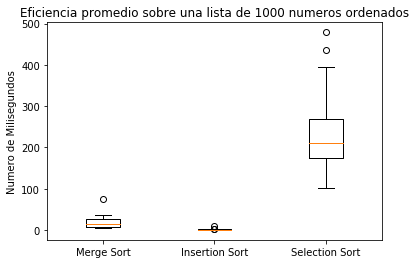

In [145]:
data = [tiempos_ms_enteros_ascendentes, tiempos_is_enteros_ascendentes, tiempos_ss_enteros_ascendentes]
etiquetas = ["Merge Sort", "Insertion Sort", "Selection Sort"]
fig, ax = plt.subplots()

fig.canvas.draw()

plt.boxplot(data)
plt.ylabel('Numero de Milisegundos')
plt.title("Eficiencia promedio sobre una lista de 1000 numeros de menor a mayor")
ax.set_xticklabels(etiquetas)
plt.show()

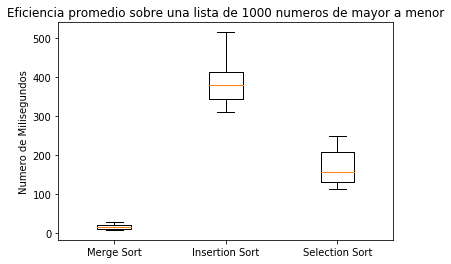

In [146]:
data = [tiempos_ms_enteros_descendientes, tiempos_is_enteros_descendientes, tiempos_ss_enteros_descendientes]
etiquetas = ["Merge Sort", "Insertion Sort", "Selection Sort"]
fig, ax = plt.subplots()

fig.canvas.draw()

plt.boxplot(data)
plt.ylabel('Numero de Milisegundos')
plt.title("Eficiencia promedio sobre una lista de 1000 numeros de mayor a menor")
ax.set_xticklabels(etiquetas)
plt.show()

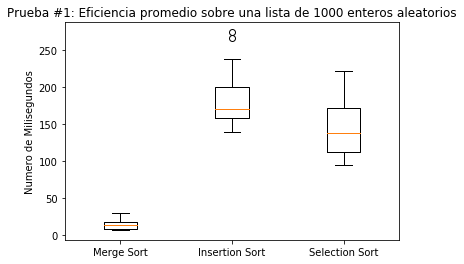

In [148]:
data = [tiempos_ms_enteros_aleatorios1, tiempos_is_enteros_aleatorios1, tiempos_ss_enteros_aleatorios1]
etiquetas = ["Merge Sort", "Insertion Sort", "Selection Sort"]
fig, ax = plt.subplots()

fig.canvas.draw()

plt.boxplot(data)
plt.ylabel('Numero de Milisegundos')
plt.title("Prueba #1: Eficiencia promedio sobre una lista de 1000 enteros aleatorios")
ax.set_xticklabels(etiquetas)
plt.show()

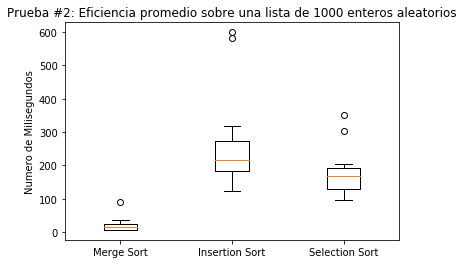

In [149]:
data = [tiempos_ms_enteros_aleatorios2, tiempos_is_enteros_aleatorios2, tiempos_ss_enteros_aleatorios2]
etiquetas = ["Merge Sort", "Insertion Sort", "Selection Sort"]
fig, ax = plt.subplots()

fig.canvas.draw()

plt.boxplot(data)
plt.ylabel('Numero de Milisegundos')
plt.title("Prueba #2: Eficiencia promedio sobre una lista de 1000 enteros aleatorios")
ax.set_xticklabels(etiquetas)
plt.show()

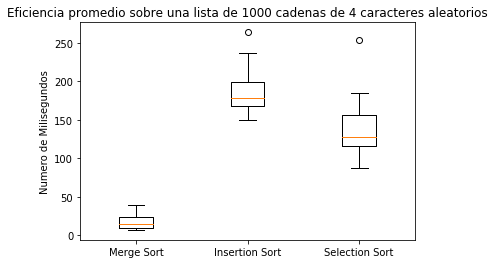

In [183]:
data = [tiempos_ms_cadenas_aleatorias, tiempos_is_cadenas_aleatorias, tiempos_ss_cadenas_aleatorias]
etiquetas = ["Merge Sort", "Insertion Sort", "Selection Sort"]
fig, ax = plt.subplots()

fig.canvas.draw()

plt.boxplot(data)
plt.ylabel('Numero de Milisegundos')
plt.title("Eficiencia promedio sobre una lista de 1000 cadenas de 4 caracteres aleatorios")
ax.set_xticklabels(etiquetas)
plt.show()

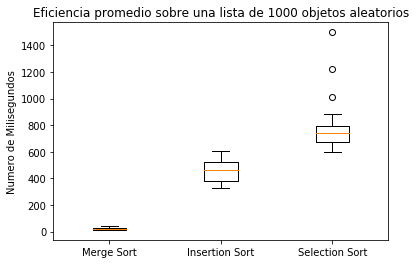

In [205]:
data = [tiempos_ms_personas, tiempos_is_personas, tiempos_ss_personas]
etiquetas = ["Merge Sort", "Insertion Sort", "Selection Sort"]
fig, ax = plt.subplots()

fig.canvas.draw()

plt.boxplot(data)
plt.ylabel('Numero de Milisegundos')
plt.title("Eficiencia promedio sobre una lista de 1000 objetos aleatorios")
ax.set_xticklabels(etiquetas)
plt.show()